In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv


Customer  Lifetime Value Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv')

In [4]:
print(df)

     customer_id           channel       cost  conversion_rate  revenue
0              1          referral   8.320327         0.123145     4199
1              2  paid advertising  30.450327         0.016341     3410
2              3   email marketing   5.246263         0.043822     3164
3              4      social media   9.546326         0.167592     1520
4              5          referral   8.320327         0.123145     2419
..           ...               ...        ...              ...      ...
795          796      social media   9.546326         0.167592     2813
796          797   email marketing   5.246263         0.043822     3439
797          798      social media   9.546326         0.167592     2101
798          799  paid advertising  30.450327         0.016341      813
799          800   email marketing   5.246263         0.043822     4820

[800 rows x 5 columns]


In [5]:
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [7]:
df.shape

(800, 5)

In [8]:
# checking for nulls in the dataset
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [9]:
df.drop_duplicates() # there were no duplicates to drop

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [10]:
df.nunique()

customer_id        800
channel              4
cost                 4
conversion_rate      4
revenue            722
dtype: int64

In [11]:
# checking the channels' popularity
df['channel'].value_counts()

channel
email marketing     214
referral            207
paid advertising    194
social media        185
Name: count, dtype: int64

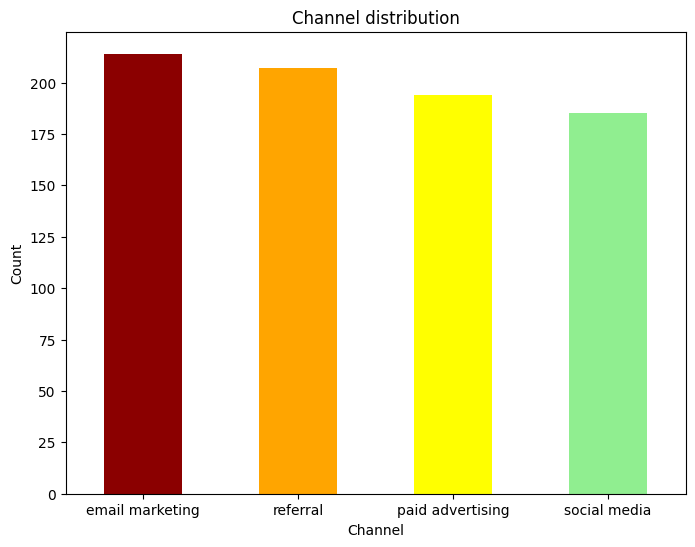

<Figure size 640x480 with 0 Axes>

In [12]:
# plotting the channels popularity bar graph
pop_chan = df['channel'].value_counts().sort_values(ascending = False)
plt.figure(figsize = (8, 6))
pop_chan.plot(kind = 'bar', color = ['darkred', 'orange', 'yellow', 'lightgreen'])
plt.title('Channel distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()
plt.savefig('channel popularity')

In [13]:
# total cost of channel marketing
tot_chan_cost = df.groupby('channel')['cost'].sum()
tot_chan_cost

channel
email marketing     1122.700340
paid advertising    5907.363479
referral            1722.307634
social media        1766.070249
Name: cost, dtype: float64

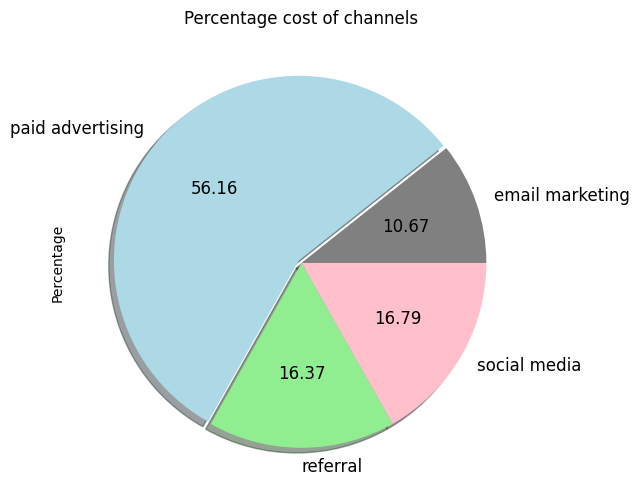

<Figure size 640x480 with 0 Axes>

In [14]:
# pie chart plot of total cost of channel marketing
tot_chan_cost = df.groupby('channel')['cost'].sum()
tot_chan_cost
plt.figure(figsize = (8, 6))
tot_chan_cost.plot.pie(subplots=True, autopct = '%1.2f', explode =[0,0.02,0,0], colors =['gray', 'lightblue', 'lightgreen', 'pink'], shadow = True, fontsize = 12)
plt.title('Percentage cost of channels')
plt.ylabel('Percentage')
plt.show()
plt.savefig('percentage cost of channels pie plot')

In [15]:
tot_chan_revenue = df.groupby('channel')['revenue'].sum()
tot_chan_revenue

channel
email marketing     604706
paid advertising    548396
referral            569552
social media        492667
Name: revenue, dtype: int64

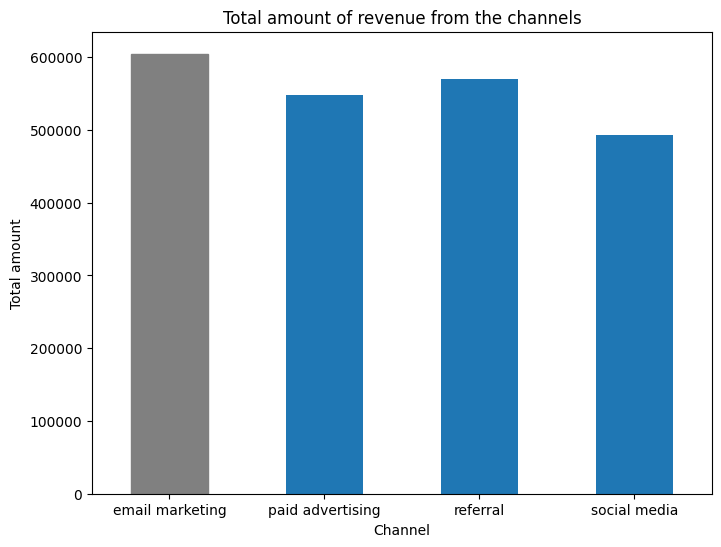

<Figure size 640x480 with 0 Axes>

In [16]:
# the total amount of revenue from the channels
tot_chan_revenue = df.groupby('channel')['revenue'].sum()
tot_chan_revenue
plt.figure(figsize = (8, 6))

barplot = tot_chan_revenue.plot(kind= 'bar')

color = 'gray'
barplot.patches[tot_chan_revenue.index.get_loc('email marketing')].set_color(color)
plt.title('Total amount of revenue from the channels')
plt.ylabel('Total amount')
plt.xlabel('Channel')
plt.xticks(rotation = 0)
plt.show()
plt.savefig('Total amount of revenue from the channels bar graph')

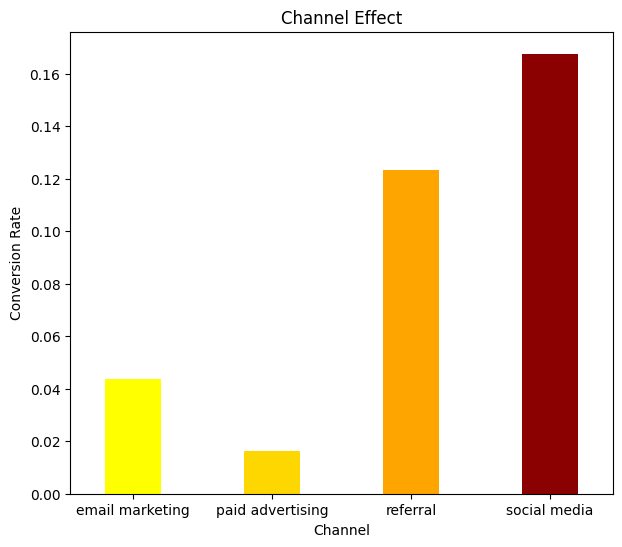

<Figure size 640x480 with 0 Axes>

In [17]:
# bar graph plot of effective channels
effective_channel = df.groupby('channel')['conversion_rate'].mean()
plt.figure(figsize = (7,6))
effective_channel.plot(kind = 'bar', x= 'channel', y = 'conversion_rate', width = 0.4, fontsize = 10, legend = False, color=['yellow', 'gold', 'orange', 'darkred'])

plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.title('Channel Effect')
plt.xticks(rotation = 0)
plt.show()
plt.savefig('graph plot of effective channels')

<Axes: >

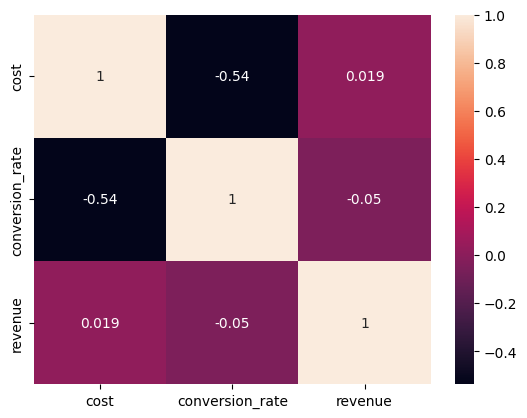

In [18]:
# checking the correlation of cost, conversion_rate, revenue
correlation = df[['cost', 'conversion_rate', 'revenue']].corr()
sns.heatmap(data = correlation, annot = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


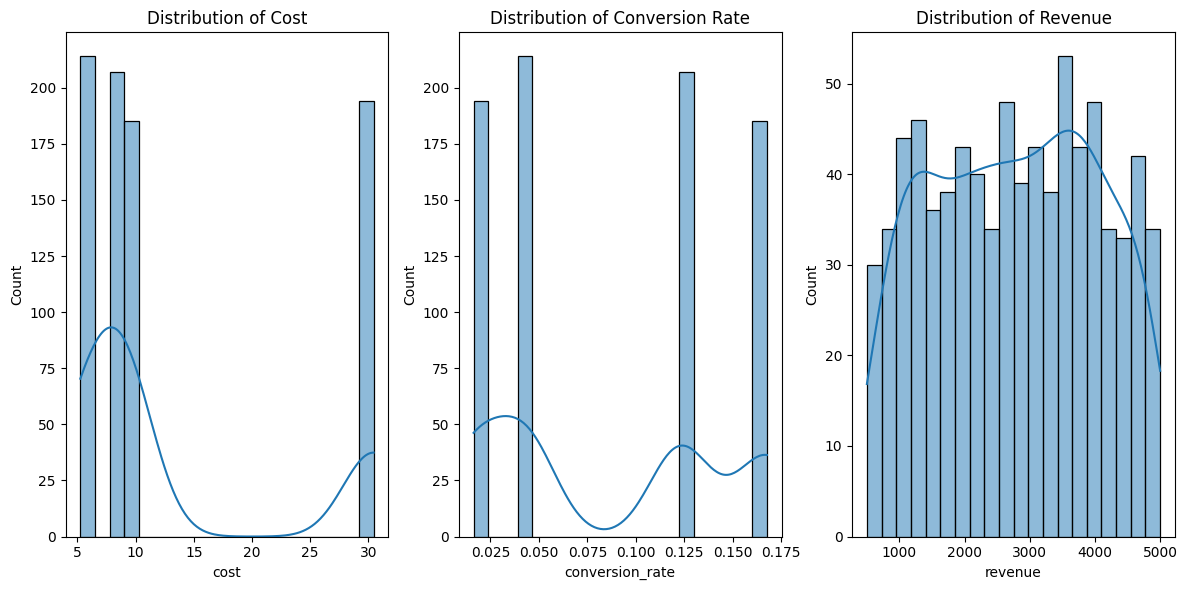

<Figure size 640x480 with 0 Axes>

In [19]:
# Visualizing distributions of cost, conversion rate, and revenue
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['cost'], bins=20, kde=True)
plt.title('Distribution of Cost')

plt.subplot(1, 3, 2)
sns.histplot(df['conversion_rate'], bins=20, kde=True)
plt.title('Distribution of Conversion Rate')

plt.subplot(1, 3, 3)
sns.histplot(df['revenue'], bins=20, kde=True)
plt.title('Distribution of Revenue')

plt.tight_layout()
plt.show()
plt.savefig('distributions of cost, conversion rate, and revenue')